In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# Data Loading and Some Initial Exploration

In [345]:
df = pd.read_csv('trump_tweets.csv')
df.date = pd.to_datetime(df.date)
df = df.rename(columns={"favorites":"likes"})
df['month'] = df.date.apply(lambda x: x.month)
df['year'] = df.date.apply(lambda x: x.year)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        56571 non-null  int64         
 1   text      56571 non-null  object        
 2   device    56571 non-null  object        
 3   likes     56571 non-null  int64         
 4   retweets  56571 non-null  int64         
 5   date      56571 non-null  datetime64[ns]
 6   month     56571 non-null  int64         
 7   year      56571 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.5+ MB
None


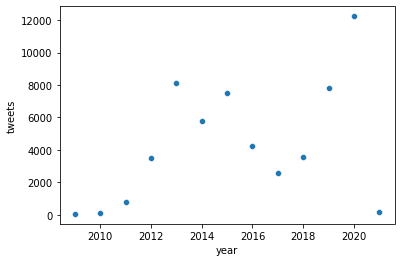

In [349]:
tweets_per_year = df.groupby('year').agg('count')['id']
_ = sns.scatterplot(data=tweets_per_year)
plt.ylabel('tweets')
plt.show()

In [49]:
for item in np.random.choice(df.text,20):
    print(item)
    print()

RT @JohnWHuber: There are the receipts. Those are the facts. The actual documents that anyone can look up for themselves.

Real journalists…

.@IvankaTrump’s @FoxNewsSunday “Power Player of the Week” interview with Chris Wallace http://t.co/SyPAQRw0gi

"""@bijobijo: @realDonaldTrump run for president, clear cut, stop the nonsense of current fools."""

What I am saying is that we never should have been in Iraq in the first place. Bush was terrible, Obama is worse! Make America GREAT again.

“What America Needs: The Case for Trump” Great new book by the esteemed Jeffrey Lord @JeffJlpa1 Available now. https://t.co/xeHKbIDApr

We’ve done a GREAT job on Covid response, making all Governors look good, some fantastic (and that’s OK), but the Lamestream Media doesn’t want to go with that narrative, and the Do Nothing Dems talking point is to say only bad about “Trump”. I made everybody look good, but me!

Today we announced vital new actions that we are taking to help former inmates find a job

In [315]:
quote_count = df.text.apply(lambda x: '"""' in x[:5]).sum()
foo = df[df.text.apply(lambda x: '"""' in x[:5])][41:60]
for item in foo.text:
    print(item)
    print()

"""We have to combat the welfare mentality that says individuals are entitled to live off taxpayers."" #TimeToGetTough"

"""So, if Iran is going to take over the oil, I say we take over the oil first by hammering out a cost-sharing plan with Iraq.""#TimeToGetTough"

"""Newsmax is a great news org and and its pres debate in IA on 12-27 will be fair, balanced , and informative."" @ralphreed"

"""What is a bit appealing about this idea of Trump hosting a debate is, consider the diverse audience that perh... (cont) http://t.co/AkcMZp0I"

"""The Architect"" @KarlRove is directly responsible for losing both houses & @BarackObama becoming President. Ignore him."

"""Sometimes understanding other people's problems is the key to finding opportunities.""  -- Midas Touch w/@atheRealKiyosaki"

"""Everyone makes mistakes, but it's what you do with them and what you learn from them that matters."" -- Midas Touch"

"""Sleepy"" Chuck Todd of NBC falls far short of the late great Tim Russert."

"""If y

In [334]:
# THIS WHOLE BOX IS OBSOLETE

# Confirm if a tweet has a person manually entered as being quoted and return that person.
def quote_check(input_text):
    output = False
    person = ''
    t = input_text.split()
    for word in t:
        if '-' in word[:3] and len(word)>=3:
            output=True
            person = word
    return output, person

# Find the tweets that are quotes
# Of those, find those that have user added text (A)
# Of (A), determine if it's a 'manual' quote attribution. Only keep DJT
# Of (A), determine the quote has a hashtag.
def quote_slicer(input_text):
    output_text = input_text
    if input_text[:3] == '"""':
        if input_text[-3] == '"""':
            output_text = ''
        else:
            result, person = quote_check(input_text)
            if result and ('donald' in person.lower()):
                return output_text
            
            index = input_text[3:].find['""']+3
            if index > 2:
                user_response = input_text[index:-1]
                return user_response
                                            
    return output_text

In [350]:
foo = df[df.text.apply(lambda x: (x[:3] == '"""') & (x[-1] == '"') & (x[-2] != '"'))]
foo = foo.text.apply(lambda x: quote_check(x))
foo2 = [x[1] for x in foo if x[0]]
len(foo2)

148

In [344]:
foo = df[df.text.apply(lambda x: ('"""' in x[:5]) & (x[-1] == '"') & (x[-2] != '"'))][21:40]
for item in foo.text:
    print(item)
    print()

"""Trading Shots with Donald Trump""--a great article in the Wall Street Journalhttp://bit.ly/c9eZbq"

"""Before Kids Can Go Places, They Need a Place To Go"" -- the motto of The Police Athletic League, an organization I'm  very proud to support"

"""It's important that we help poor people to become independent, self-sufficient individuals who gain the benefits of work."" #TimeToGetTough"

"""Obamacare has to be killed now before it grows into an even bigger mess, as it inevitably will."" #TimeToGetTough"

"""The sad truth is some Republicans in Congress are clueless when it comes to negotiation.""  #TimeToGetTough"

"""He thinks that the wealth you create belongs to the government--@BarackObama doesn't respect the fact that the (cont) http://t.co/D66nscyB"

"""People who have the ability to work should. But with the government happy to send checks, too many of them don't."" #TimeToGetTough"

"""When are we going to wake up and realize that we are funding our enemies?""  #TimeToGetToug

In [308]:
hyperlink_count = df.text.apply(lambda x: "https:" in x).sum()
retweet_count = df.text.apply(lambda x: 'RT' in x[:5]).sum()
rt_link_count = df.text.apply(lambda x: ("https:" in x) & ("RT" in x[:5])).sum()

foo = df[df.text.apply(lambda x: ("https" in x) & ("RT" in x[:5]))][200:220]
for item in foo.text:
    print(item)
    print()

RT @WhiteHouse: We continue to monitor Tropical Storm Isaias closely. https://t.co/qKSVWpXCoy

RT @SpaceX: Starship takes flight https://t.co/IWvwcA05hl

RT @GOP: Only 4️⃣ days until ELECTION DAY!
 
https://t.co/lQYB8jZfOp https://t.co/UnAKx6zXV6

RT @GOP: America is roaring back!
 
To continue progress like this, we NEED #FourMoreYears of @realDonaldTrump!
 
https://t.co/lQYB8jZfOp h…

RT @TeamTrump: First Lady Melania Trump: “We are a country of hope, not a country of fear or weakness.” https://t.co/9n1841cdA6

RT @GOPChairwoman: The media’s silence and lack of reporting about Biden’s pay-for-play scheme with China is ridiculous. https://t.co/cX1ck…

RT @realDonaldTrump: GEORGIA! https://t.co/xhsIPAmp6S

RT @realDailyWire: BREAKING: Texas Files Lawsuit Against 4 States At Supreme Court Over Election Rules https://t.co/02NMyVWcO9 https://t.co…

RT @HeyTammyBruce: 🚨 Excellent news. “Texas Sues Georgia, Michigan, Pennsylvania, and Wisconsin at Supreme Court over Election Rules” https…



In [36]:
foo = df[df.text.apply(lambda x: "RT" in x[:5])][:20]

In [46]:
foo.iloc[4].text

'RT @GOPChairwoman: The economic boom continues!\n\n273K jobs added in February \n\n7M+ jobs added since @realDonaldTrump was elected\n\nUnemploym…'

In [33]:
print(f'The total number of tweets is; {len(df)}')
print(f'The number of tweets with quotes: {quote_count}')
print(f'The number of tweets with retweets: {retweet_count}')
print(f'The number of tweets with hyperlinks: {hyperlink_count}')
print(f'The number of tweets with RT and links: {rt_link_count}')

The total number of tweets is; 56571
The number of tweets with quotes: 11558
The number of tweets with retweets: 10016
The number of tweets with hyperlinks: 11511
The number of tweets with RT and links: 2870


# Data Cleaning Tasks
## 1. &amp
## 2. \n
## 3. hyperlinks
## 4. Twitter Functionality?
    a. Quotes
    b. Retweets
    c. @'s
    d. #'s

In [294]:
clean_df = df.copy()

In [351]:
foo = 0
for item in clean_df[clean_df.text.apply(lambda x: (x[-1:] == '"') & (x[-2] != '"') & (x[0] == '"'))][:35].text:
    #print(foo)
    foo+=1
    #print(item)
    #print()

In [ ]:
# Cleaner Functions

def split_ampersands(input_string):
    split = input_string.split('&')
    output = ''
    for item in split:
        output += item +'& '
    return output[:-2]

def white_space_remover(input_df):
    while input_df.text.apply(lambda x: '  ' in x).sum() > 0:
        input_df.text = input_df.text.apply(lambda x: x.replace('  ', ' '))

def hyperlink_remover(input_text):
    t = input_text.split()
    output_string = ""
    for word in t:
        if "http" in word:
            start=word.find("http")
            s = " " + word[:start]
            output_string += s
            output_string = output_string.strip()
        else:
            output_string += (" " + word)
            output_string = output_string.strip()
    return output_string



In [ ]:
# Full Clean

def text_cleaner(input_df):
    output_df = input_df.copy()
    
    # Clean up HTML escape characters
    input_df['text'] = input_df.text.apply(lambda x: x.replace('&amp;', '&')).apply(lambda x: x.replace('&amp','&'))
    input_df['text'] = input_df.text.apply(lambda x: x.replace('&,', '&')).apply(lambda x: x.replace('&,', '&'))
    input_df['text'] = input_df.text.apply(lambda x: x.replace('&…', '...')).apply(lambda x: x.replace('&...', '...'))
    input_df['text'] = input_df.text.apply(lambda x: x.replace('&gt;', '>')).apply(lambda x: x.replace('&gt','>'))
    input_df['text'] = input_df.text.apply(lambda x: x.replace('&lt;', '<')).apply(lambda x: x.replace('&lt','<'))
    
    # Fix ampersands
    input_df['text'] = input_df.text.apply(lambda x: split_ampersands(x)) 
    white_space_remover(input_df)
    
    # Clean out new line characters
    while input_df.text.apply(lambda x: ' \n' in x).sum() >0 :
    input_df['text'] = input_df.text.apply(lambda x: x.replace(' \n', '. '))
    white_space_remover(input_df)
    
    while input_df.text.apply(lambda x: '\n' in x).sum() > 0:
    input_df['text'] = input_df.text.apply(lambda x: x.replace('\n', '. '))
    white_space_remover(input_df)
    
    # Reove hyperlinks
    input_df['text'] = input_df.text.apply(lambda x: hyperlink_remover(x))
    white_space_remover(input_df)

In [295]:
# Cleaning up the & escape characters
clean_df['text'] = clean_df.text.apply(lambda x: x.replace('&amp;', '&')).apply(lambda x: x.replace('&amp','&'))
clean_df['text'] = clean_df.text.apply(lambda x: x.replace('&,', '&')).apply(lambda x: x.replace('&,', '&'))
clean_df['text'] = clean_df.text.apply(lambda x: x.replace('&…', '...')).apply(lambda x: x.replace('&...', '...'))
clean_df['text'] = clean_df.text.apply(lambda x: x.replace('&gt;', '>')).apply(lambda x: x.replace('&gt','>'))
clean_df['text'] = clean_df.text.apply(lambda x: x.replace('&lt;', '<')).apply(lambda x: x.replace('&lt','<'))

In [296]:
def split_ampersands(input_string):
    split = input_string.split('&')
    output = ''
    for item in split:
        output += item +'& '
    return output[:-2]

clean_df['text'] = clean_df.text.apply(lambda x: split_ampersands(x))    

In [297]:
split_ampersands('what should &I do')

'what should & I do'

In [298]:
from collections import Counter
counter = Counter()
for item in clean_df.text:
    for word in item.split():
        if word[0] == '&':
            counter[word]+=1

for word in counter.keys():
    print(f'{word} : {counter[word]}')

& : 5557


In [299]:
# Cleaning up spaces
def white_space_remover(input_df):
    while input_df.text.apply(lambda x: '  ' in x).sum() > 0:
        input_df.text = input_df.text.apply(lambda x: x.replace('  ', ' '))

white_space_remover(clean_df)

In [300]:
while clean_df.text.apply(lambda x: ' \n' in x).sum() >0 :
    clean_df['text'] = clean_df.text.apply(lambda x: x.replace(' \n', '. '))
    white_space_remover(clean_df)
    
while clean_df.text.apply(lambda x: '\n' in x).sum() > 0:
    clean_df['text'] = clean_df.text.apply(lambda x: x.replace('\n', '. '))
    white_space_remover(clean_df)

In [301]:
# Make a method to strip out the hyperlinks
def hyperlink_remover(input_text):
    t = input_text.split()
    output_string = ""
    for word in t:
        if "http" in word:
            start=word.find("http")
            s = " " + word[:start]
            output_string += s
            output_string = output_string.strip()
        else:
            output_string += (" " + word)
            output_string = output_string.strip()
    return output_string

In [302]:
clean_df['text'] = clean_df.text.apply(lambda x: hyperlink_remover(x))
white_space_remover(clean_df)

In [303]:
# Clear out the tweets that got blanked out
clean_df['text'] = clean_df.text.apply(lambda x: x if ((len(str(x))>0) & (str(x)!='nan'))else np.nan)
clean_df.dropna(inplace=True)

In [304]:
for item in clean_df[clean_df.text.apply(lambda x: (x[-1:] == '"') & (x[-2] != '"') & (x[0] == '"'))][:5].text:
    print(item)
    print()

"Dominion-izing the Vote"

"""@TheConnieMoore: @realDonaldTrump see u Sat in GA !!"" Great!"

"""@Ozziemae: @realDonaldTrump I love that you speak whatever's on your mind. That is true courage. Living your truth."

"""@SirMiestro: S/O TO MY MAN @realDonaldTrump ....#SALUTE Thanks Mike."

"""@piersmorgan: Bob Costas is one of the smartest people I've interviewed. #CNN"" But you told me I was the smartest (by far)!"



In [306]:
foo = 0
for item in np.random.choice(clean_df.text,10):
    print(foo)
    foo +=1
    print(item)
    print()

0
"RT @RightlyNews: ""What's a high priced Clinton attorney doing representing a low level IT staffer for the Democrats?"" -@jessebwatters on t..."

1
.@THEGaryBusey is definitely different. #CelebApprentice

2
Sleepy Joe’s representatives have just put out an ad saying that I went to play golf (exercise) today. They think I should stay in the White House at all times. What they didn’t say is that it’s the first time I’ve played golf in almost 3 months, that Biden was constantly.....

3
RT @SenateGOP: .@SenJoniErnst:. . How did the Obama Administration react to the invasion of Ukraine?. . They reacted by sending blankets.. . Blan…

4
Congratulations to Gary Woodland in winning the United States Open Golf Championship. Fantastic playing, great heart - there will be more in Gary’s future!

5
"""@GregWallace66 Hey @Trump_Charlotte is hosting @RustyWallace Golf Classic on 5/19 benefiting @NASCAR_FDN."" Rusty will have a great day!"

6
I promise not to do this to Greenland!

7
RT @Kimberl40